In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [154]:
tweets = pd.read_csv("stock_tweets.csv")
stocks = pd.read_csv("stock_yfinance_data.csv")

In [155]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)

### Exploritory Data Analysis

In [156]:
tweets.head()

,Date,Tweet,Stock Name,Company Name
0,2022-09-29 23:41:16+00:00,"Mainstream media has done an amazing job at brainwashing people. Today at work, we were asked what companies we believe in &amp; I said @Tesla because they make the safest cars &amp; EVERYONE disagreed with me because they heard“they catch on fire &amp; the batteries cost 20k to replace”",TSLA,"Tesla, Inc."
1,2022-09-29 23:24:43+00:00,Tesla delivery estimates are at around 364k from the analysts. $tsla,TSLA,"Tesla, Inc."
2,2022-09-29 23:18:08+00:00,"3/ Even if I include 63.0M unvested RSUs as of 6/30, additional equity needed for the RSUs is 63.0M x $54.20 = $3.4B. If the deal closed tomorrow at $54.20, Elon would need $2.0B for existing shares plus $3.4B for RSUs, so $5.4B new equity. $twtr $tsla",TSLA,"Tesla, Inc."
3,2022-09-29 22:40:07+00:00,"@RealDanODowd @WholeMarsBlog @Tesla Hahaha why are you still trying to stop Tesla FSD bro! Get your shit together and make something better? Thats how companies work, they competed. Crying big old ass fart clown!",TSLA,"Tesla, Inc."
4,2022-09-29 22:27:05+00:00,"@RealDanODowd @Tesla Stop trying to kill kids, you sad deranged old man",TSLA,"Tesla, Inc."


In [4]:
stocks.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Stock Name
0,2021-09-30,260.333344,263.043335,258.333344,258.493347,258.493347,53868000,TSLA
1,2021-10-01,259.466675,260.260010,254.529999,258.406677,258.406677,51094200,TSLA
2,2021-10-04,265.500000,268.989990,258.706665,260.510010,260.510010,91449900,TSLA
3,2021-10-05,261.600006,265.769989,258.066681,260.196655,260.196655,55297800,TSLA
4,2021-10-06,258.733337,262.220001,257.739990,260.916656,260.916656,43898400,TSLA


In [ ]:
tweets.info()

In [ ]:
stocks.info()

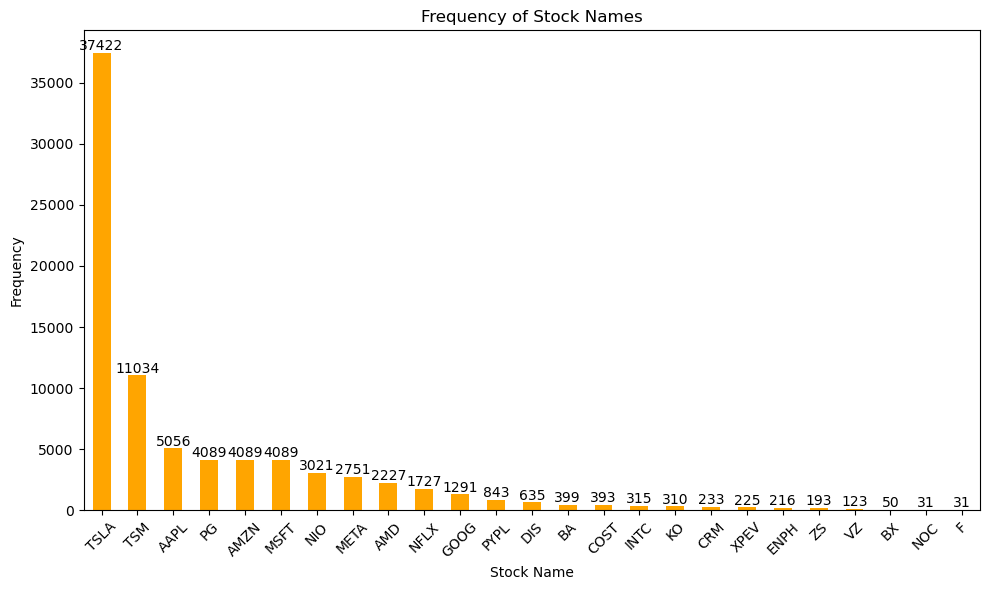

In [16]:
import matplotlib.pyplot as plt

# Plotting frequency of tweets for each company
plt.figure(figsize=(10, 6))
ax = tweets['Stock Name'].value_counts().plot(kind='bar', color='orange')
plt.title('Frequency of Stock Names')
plt.xlabel('Stock Name')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()

# Adding the value of each bar on top of it
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

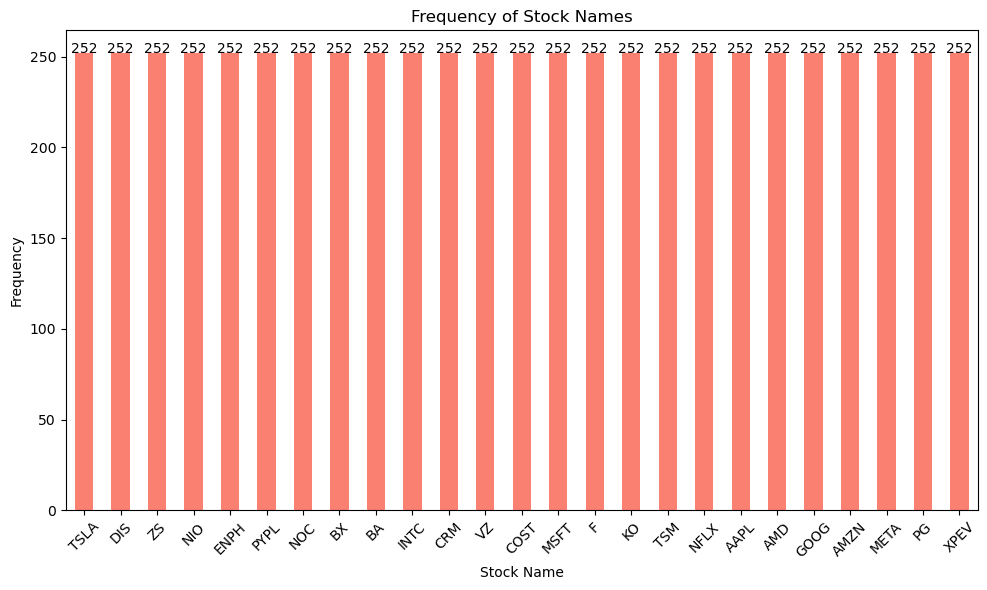

In [6]:
import matplotlib.pyplot as plt

# See if appearence of company is the same
plt.figure(figsize=(10, 6))
stock_counts = stocks['Stock Name'].value_counts()
stocks['Stock Name'].value_counts().plot(kind='bar', color='salmon')
plt.title('Frequency of Stock Names')
plt.xlabel('Stock Name')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
for i, count in enumerate(stock_counts):
    plt.text(i, count + 0.2, str(count), ha='center')
plt.tight_layout()
plt.show()

In [7]:
# Convert 'Date' column to datetime format and extract only the date part
tweets['Date'] = pd.to_datetime(tweets['Date']).dt.date

# Calculate frequency of each date and company
date_company_frequency = tweets.groupby(['Date', 'Stock Name']).size().reset_index(name='Frequency')

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Print frequency of each date along with the associated company
print("Frequency of Dates with Associated Company:")
print(date_company_frequency)

Frequency of Dates with Associated Company:
            Date Stock Name  Frequency
0     2021-09-30       AAPL          7
1     2021-09-30        AMD          6
2     2021-09-30       AMZN          5
3     2021-09-30        DIS          1
4     2021-09-30       GOOG          1
5     2021-09-30       META          3
6     2021-09-30       MSFT          5
7     2021-09-30       NFLX          5
8     2021-09-30        NIO          7
9     2021-09-30         PG          5
10    2021-09-30       TSLA         90
11    2021-09-30        TSM         42
12    2021-09-30       XPEV          1
13    2021-10-01       AAPL         11
14    2021-10-01        AMD          2
15    2021-10-01       AMZN          8
16    2021-10-01        CRM          1
17    2021-10-01        DIS          2
18    2021-10-01       GOOG          2
19    2021-10-01       META         11
20    2021-10-01       MSFT          8
21    2021-10-01       NFLX          5
22    2021-10-01        NIO         17
23    2021-10-01    

In [8]:
# Convert 'Date' column to datetime format and extract only the date part
tweets['Date'] = pd.to_datetime(tweets['Date']).dt.date

# Filter DataFrame for a specific company (e.g., 'Microsoft Corporation')
company_name_filter = 'AAPL'
filtered_tweets = tweets[tweets['Stock Name'] == company_name_filter]

# Calculate frequency of each date
date_frequency = filtered_tweets['Date'].value_counts().sort_index()

# Print frequency of each date for the specified company
print(f"Frequency of Dates for {company_name_filter}:")
print(date_frequency)

Frequency of Dates for AAPL:
Date
2021-09-30      7
2021-10-01     11
2021-10-02      4
2021-10-03      1
2021-10-04     10
2021-10-05      5
2021-10-06     10
2021-10-07      8
2021-10-08      7
2021-10-09      4
2021-10-10      5
2021-10-11      2
2021-10-12     23
2021-10-13      5
2021-10-14     15
2021-10-15      7
2021-10-16      5
2021-10-17      9
2021-10-18     23
2021-10-19     14
2021-10-20     10
2021-10-21     10
2021-10-22     10
2021-10-23      8
2021-10-24     10
2021-10-25     10
2021-10-26      9
2021-10-27     14
2021-10-28     29
2021-10-29     30
2021-10-30      8
2021-10-31      7
2021-11-01      9
2021-11-02     13
2021-11-03      6
2021-11-04     11
2021-11-05      9
2021-11-06      4
2021-11-07      7
2021-11-08     14
2021-11-09     20
2021-11-10      8
2021-11-11      3
2021-11-12      9
2021-11-13      4
2021-11-14      4
2021-11-15      7
2021-11-16     12
2021-11-17     15
2021-11-18     47
2021-11-19     20
2021-11-20     12
2021-11-21     10
2021-11-22  

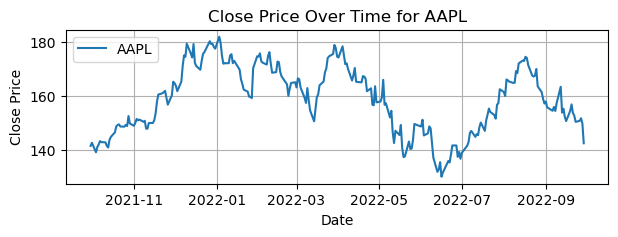

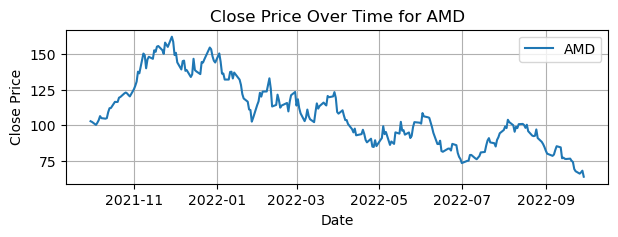

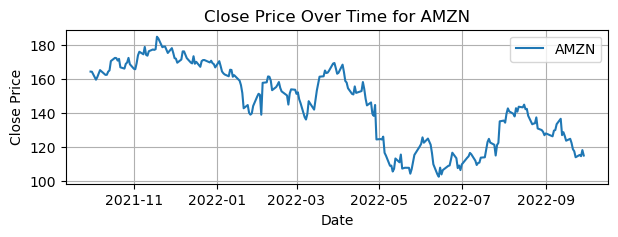

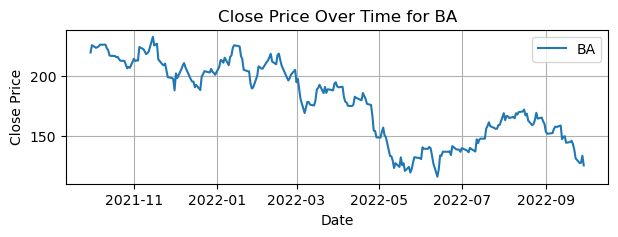

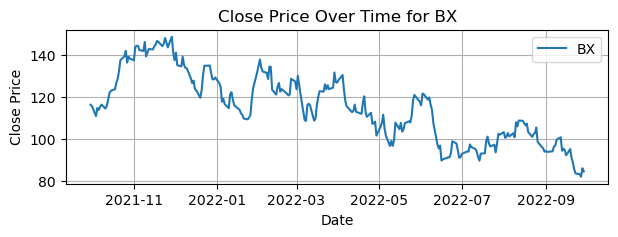

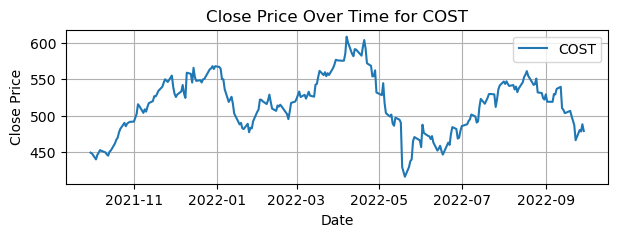

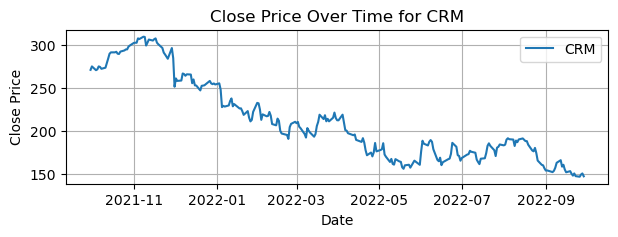

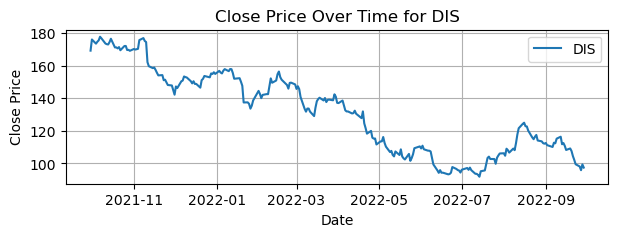

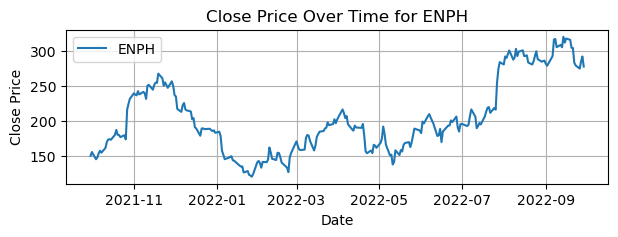

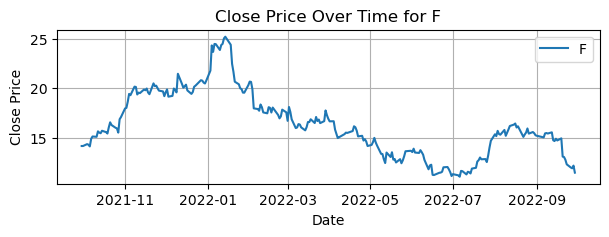

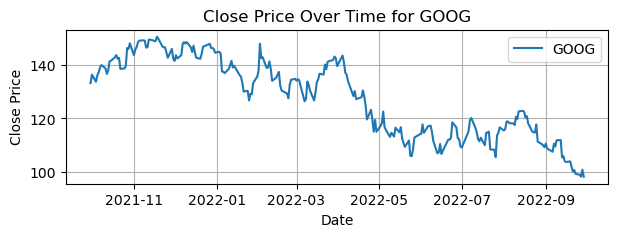

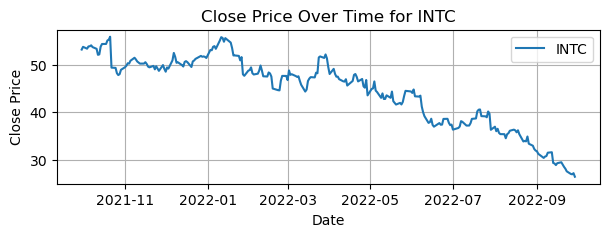

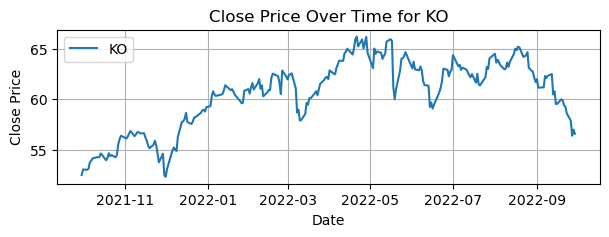

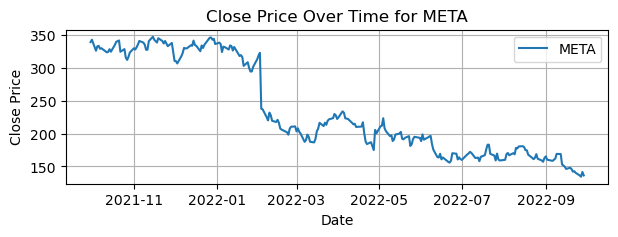

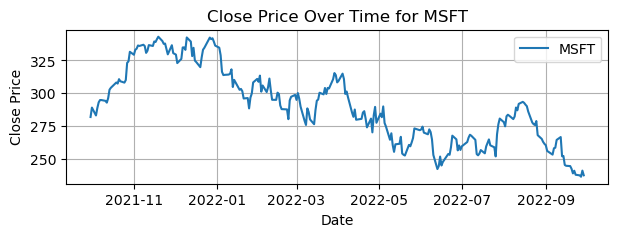

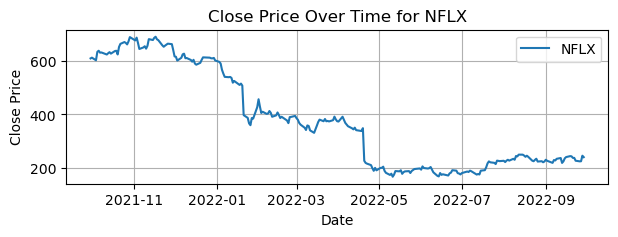

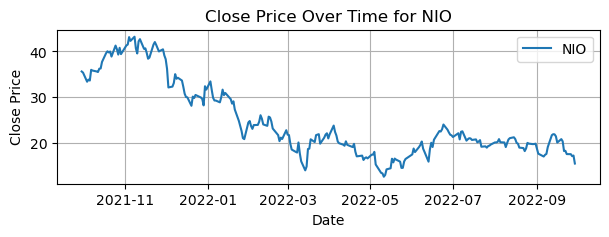

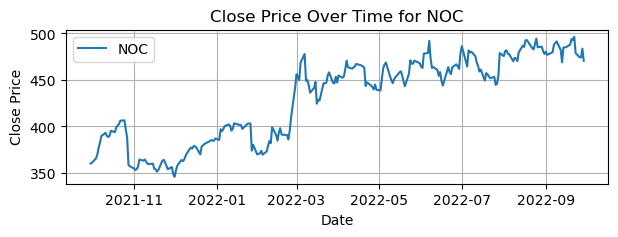

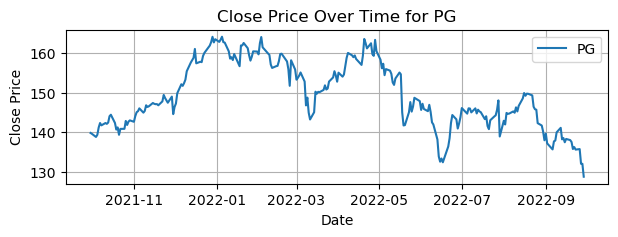

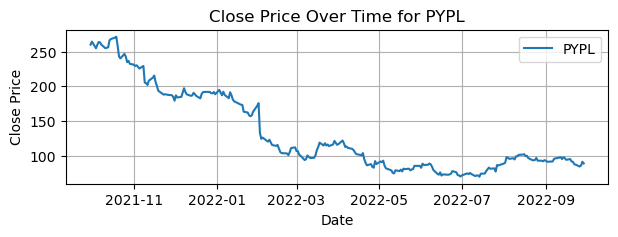

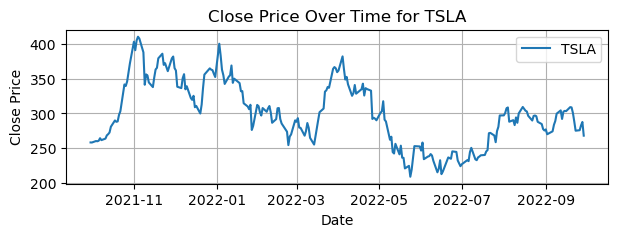

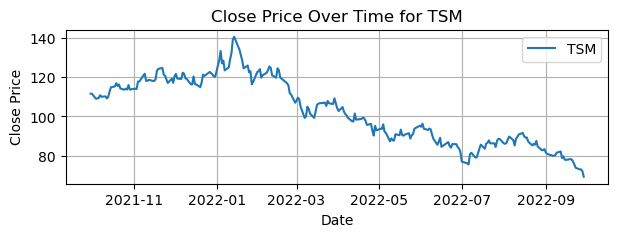

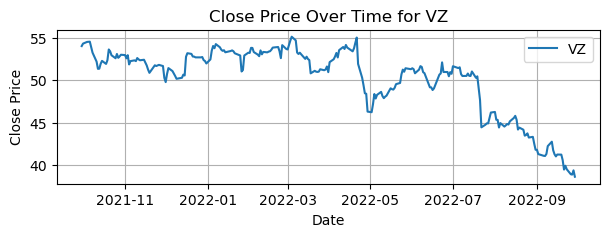

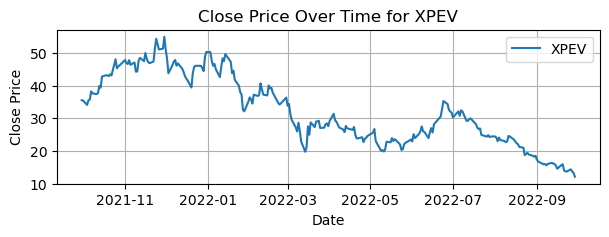

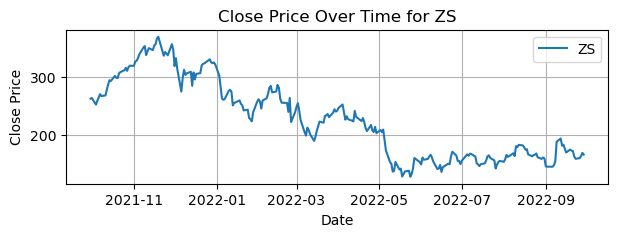

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'Date' column to datetime format
stocks['Date'] = pd.to_datetime(stocks['Date'])

# Plot each company stock price separately
for ticker_symbol, group in stocks.groupby('Stock Name'):
    plt.figure(figsize=(7, 2))  # Adjust size if necessary
    plt.plot(group['Date'], group['Close'], label=ticker_symbol)
    plt.title('Close Price Over Time for {}'.format(ticker_symbol))
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.legend()
    plt.grid(True)
    plt.show()

### Preprocessing

In [169]:
# Convert 'DateTime' column to datetime and extract only the date part
tweets['Date'] = pd.to_datetime(tweets['Date']).dt.date
stocks['Date'] = pd.to_datetime(stocks['Date']).dt.date

In [158]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [ ]:
import importlib
import subprocess

#check for missing packages
def install_missing_packages(packages):
    for package in packages:
        try:
            importlib.import_module(package)
        except ImportError:
            print(f"{package} is not installed. Installing...")
            subprocess.check_call(['pip', 'install', package])
        finally:
            print(f"{package} is installed.")

#install necassary packages for NLP
def check_and_install_nltk_packages():
    required_packages = ['nltk']
    nltk_data_packages = ['stopwords', 'punkt', 'wordnet']
    
    for package in required_packages:
        try:
            importlib.import_module(package)
        except ImportError:
            print(f"{package} is not installed. Installing...")
            subprocess.check_call(['pip', 'install', package])
        finally:
            print(f"{package} is installed.")
    
    # Install NLTK data packages
    import nltk
    nltk.download(nltk_data_packages)
    
    print("All required packages are installed.")

# Call the function to check and install NLTK packages if needed
check_and_install_nltk_packages()

In [172]:
def preprocess_tweet(tweet):
    # Remove special characters, URLs, numbers, mentions, and hashtags
    tweet = re.sub(r'http\S+|www\S+|https\S+|\d+|@\S+|#\S+', '', tweet, flags=re.MULTILINE)
    
    # Tokenization
    tokens = word_tokenize(tweet)
    
    # Lowercasing
    tokens = [token.lower() for token in tokens]
    
    # Remove punctuation
    table = str.maketrans('', '', string.punctuation)
    tokens = [token.translate(table) for token in tokens]
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens_lemmatized = [lemmatizer.lemmatize(token) for token in tokens]
    
    return tokens_lemmatized

In [173]:
tweets['lemmatized_tweets'] = tweets['Tweet'].apply(lambda x: preprocess_tweet(x))

In [174]:
tweets.to_csv('tweet_output.csv', index=False) 

### Labeling

In [176]:
from textblob import TextBlob
import emoji

In [193]:
def translate_emojis(text):
    """Convert emojis to word descriptions."""
    return emoji.demojize(text, delimiters=(" ", " "))

def get_sentiment(tokens):
    # Join tokens into a single string
    text = ' '.join(tokens)
    # Translate emojis to text
    text = translate_emojis(text)
    # Create a TextBlob object
    blob = TextBlob(text)
    # Get the sentiment score from TextBlob
    sentiment_score = blob.sentiment.polarity
    return sentiment_score

In [194]:
tweets['sentiment'] = tweets['lemmatized_tweets'].apply(get_sentiment)

In [195]:
tweets.head()

,Date,Tweet,Stock Name,Company Name,lemmatized_tweets,sentiment
0,2022-09-29,"Mainstream media has done an amazing job at brainwashing people. Today at work, we were asked what companies we believe in &amp; I said @Tesla because they make the safest cars &amp; EVERYONE disagreed with me because they heard“they catch on fire &amp; the batteries cost 20k to replace”",TSLA,"Tesla, Inc.","[mainstream, medium, done, amazing, job, brainwashing, people, , today, work, , asked, company, believe, , amp, , said, make, safest, car, , amp, , everyone, disagreed, heard, “, catch, fire, , amp, , battery, cost, k, replace, ”]",0.600000
1,2022-09-29,Tesla delivery estimates are at around 364k from the analysts. $tsla,TSLA,"Tesla, Inc.","[tesla, delivery, estimate, around, k, analyst, , , tsla]",0.000000
2,2022-09-29,"3/ Even if I include 63.0M unvested RSUs as of 6/30, additional equity needed for the RSUs is 63.0M x $54.20 = $3.4B. If the deal closed tomorrow at $54.20, Elon would need $2.0B for existing shares plus $3.4B for RSUs, so $5.4B new equity. $twtr $tsla",TSLA,"Tesla, Inc.","[, even, include, unvested, rsus, , , additional, equity, needed, rsus, x, , , , , b, , deal, closed, tomorrow, , , , elon, would, need, , b, existing, share, plus, , b, rsus, , , b, new, equity, , , twtr, , tsla]",0.018182
3,2022-09-29,"@RealDanODowd @WholeMarsBlog @Tesla Hahaha why are you still trying to stop Tesla FSD bro! Get your shit together and make something better? Thats how companies work, they competed. Crying big old ass fart clown!",TSLA,"Tesla, Inc.","[hahaha, still, trying, stop, tesla, fsd, bro, , get, shit, together, make, something, better, , thats, company, work, , competed, , cry, big, old, as, fart, clown, ]",0.120000
4,2022-09-29,"@RealDanODowd @Tesla Stop trying to kill kids, you sad deranged old man",TSLA,"Tesla, Inc.","[stop, trying, kill, kid, , sad, deranged, old, man]",-0.200000


In [297]:
tweets.to_csv('tweet_output2.csv', index=False) 

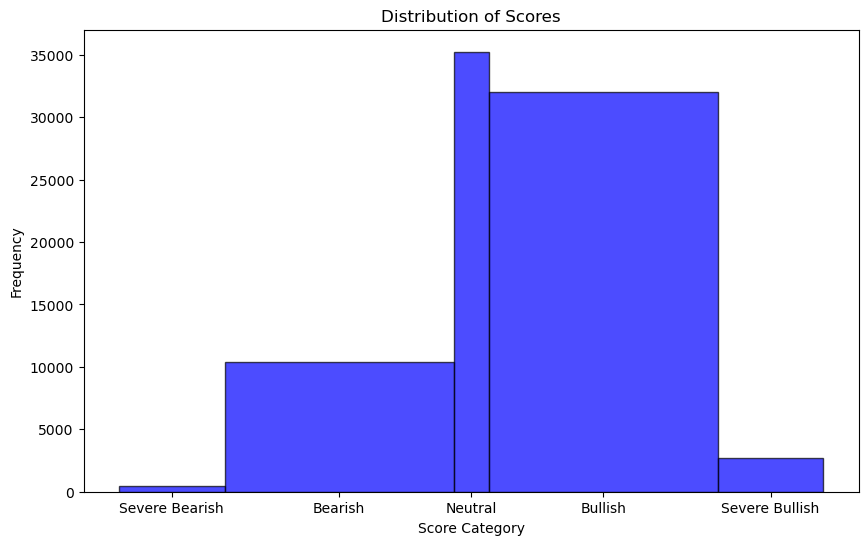

In [298]:
# Define bin edges corresponding to the categories
bin_edges = [-1, -0.7, -0.05, 0.05, 0.7, 1]

# Create the histogram
plt.figure(figsize=(10, 6))
plt.hist(tweets['sentiment'], bins=bin_edges, color='blue', alpha=0.7, edgecolor='black')

# Adding labels for each category
plt.xticks([-0.85, -0.375, 0, 0.375, 0.85], 
           ['Severe Bearish', 'Bearish', 'Neutral', 'Bullish', 'Severe Bullish'])

# Set title and labels
plt.title('Distribution of Scores')
plt.xlabel('Score Category')
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [196]:
def daily_average_sentiment(df):
    daily_avg_sentiments = []
    # Define different weights for each sentiment class
    weights = {
        'Severe Bearish': 1.5,
        'Bearish': 1.3,
        'Neutral': 1.0,
        'Bullish': 1.3,
        'Severe Bullish': 1.5
    }
    # Group by both 'Company Name' and 'Date'
    for (company, date), group in df.groupby(['Company Name', 'Date']):
        num_sentiments = len(group)
        
        # Calculate proportions of each sentiment category
        severe_bearish_count = ((group['sentiment'] <= -0.7) & (group['sentiment'] >= -1)).sum()
        bearish_count = ((group['sentiment'] < -0.05) & (group['sentiment'] > -0.7)).sum()
        neutral_count = ((group['sentiment'] >= -0.05) & (group['sentiment'] <= 0.05)).sum()
        bullish_count = ((group['sentiment'] > 0.05) & (group['sentiment'] < 0.7)).sum()
        severe_bullish_count = ((group['sentiment'] >= 0.7) & (group['sentiment'] <= 1)).sum()
        
        # Determine the majority class
        counts = {
            'Severe Bearish': severe_bearish_count,
            'Bearish': bearish_count,
            'Neutral': neutral_count,
            'Bullish': bullish_count,
            'Severe Bullish': severe_bullish_count
        }
        majority_class = max(counts, key=counts.get)
        
        # Calculate weighted sentiments
        weighted_sentiments = []
        for sentiment in group['sentiment']:
            if (majority_class == 'Severe Bearish' and -1 <= sentiment <= -0.7) or \
               (majority_class == 'Bearish' and -0.7 < sentiment < -0.05) or \
               (majority_class == 'Neutral' and -0.05 <= sentiment <= 0.05) or \
               (majority_class == 'Bullish' and 0.05 < sentiment < 0.7) or \
               (majority_class == 'Severe Bullish' and 0.7 <= sentiment <= 1):
                weight = weights[majority_class]
            else:
                weight = 1.0
            weighted_sentiments.append(sentiment * weight)

        # Calculate average weighted sentiment
        weighted_average_sentiment = sum(weighted_sentiments) / num_sentiments
        
        daily_avg_sentiments.append({
            'Company': company,
            'Date': date,
            'Daily_Avg_Sentiment': weighted_average_sentiment
        })
    
    return pd.DataFrame(daily_avg_sentiments)

stocks["Average_sentiment"] = daily_average_sentiment(tweets)['Daily_Avg_Sentiment'] #calculate average setiment

In [197]:
stocks.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Stock Name,Average_sentiment
0,2021-09-30,260.333344,263.043335,258.333344,258.493347,258.493347,53868000,TSLA,0.089583
1,2021-10-01,259.466675,260.260010,254.529999,258.406677,258.406677,51094200,TSLA,0.139394
2,2021-10-04,265.500000,268.989990,258.706665,260.510010,260.510010,91449900,TSLA,0.083333
3,2021-10-05,261.600006,265.769989,258.066681,260.196655,260.196655,55297800,TSLA,0.494000
4,2021-10-06,258.733337,262.220001,257.739990,260.916656,260.916656,43898400,TSLA,0.715000


In [198]:
stocks.to_csv('stock_output.csv', index=False) 

### Forecasting

In [299]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings("ignore")

In [300]:
stocks = pd.read_csv('stock_output.csv')

In [301]:
stocks_tesla = stocks[stocks['Stock Name'] == 'TSLA']

*Visualize time series of stock*

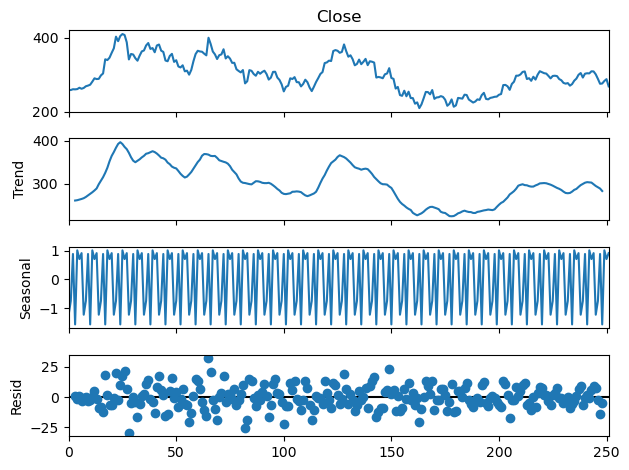

In [91]:
#decompose the stock price of Tesla
result = seasonal_decompose(stocks_tesla['Close'], model="additive", period=7)
result.plot();

*Determining Parameters*

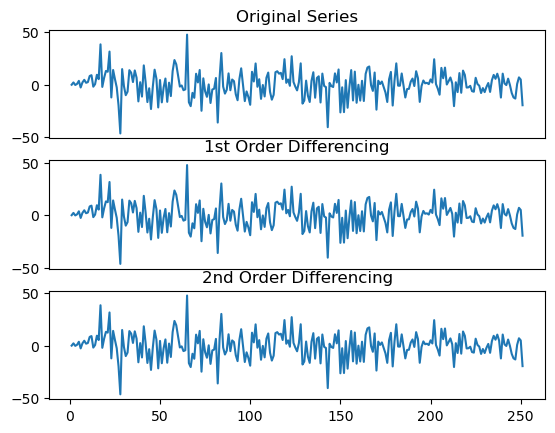

In [78]:
# Model time seres and different level of differencing
fig, (ax1, ax2, ax3) = plt.subplots(3)
ax1.plot(stocks_tesla['Close'].diff()); ax1.set_title('Original Series'); ax1.axes.xaxis.set_visible(False)
# 1st Differencing
ax2.plot(stocks_tesla['Close'].diff()); ax2.set_title('1st Order Differencing'); ax2.axes.xaxis.set_visible(False)
# 2nd Differencing
ax3.plot(stocks_tesla['Close'].diff()); ax3.set_title('2nd Order Differencing')
plt.show()

In [229]:
from statsmodels.tsa.stattools import adfuller

# Perform the Augmented Dickey-Fuller test
result = adfuller(stocks_tesla['Close'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

# Interpretation if stationary or not
if result[1] < 0.05:
    print("The time series is stationary.")
else:
    print("The time series is not stationary.")

ADF Statistic: -2.188114
p-value: 0.210588
Critical Values:
	1%: -3.457
	5%: -2.873
	10%: -2.573
The time series is not stationary.


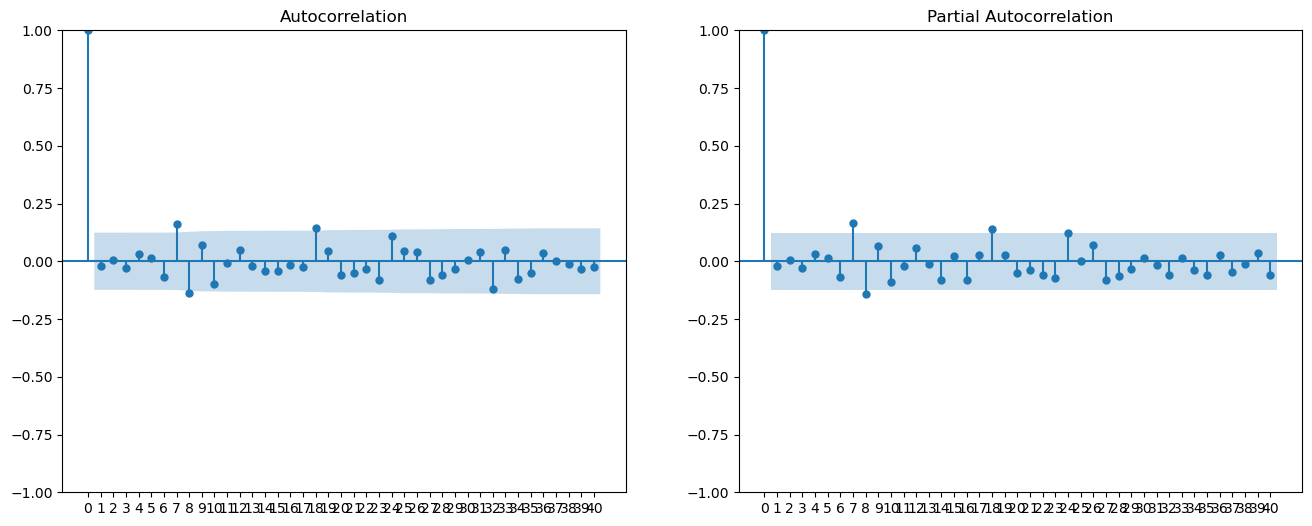

In [239]:
# Set up the figure and axis
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Plot autocorrelation
plot_acf(stocks_tesla['Close'].diff().dropna(), lags=40, ax=ax[0])
ax[0].set_xticks(range(41))  # Set x-axis ticks manually for the first subplot

# Plot partial autocorrelation
plot_pacf(stocks_tesla['Close'].diff().dropna(), lags=40, ax=ax[1])
ax[1].set_xticks(range(41))  # Set x-axis ticks manually for the second subplot

# Show the plot
plt.show()

*SARIMA*

In [302]:
import statsmodels.api as sm

#create SARIMA model
model = sm.tsa.statespace.SARIMAX(stocks_tesla['Close'], order=(0, 1, 0), seasonal_order=(1, 1, 0, 12),
                                  enforce_stationarity=False,
                                  enforce_invertibility=False)
arima_result = model.fit()

print(arima_result.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                  252
Model:             SARIMAX(0, 1, 0)x(1, 1, 0, 12)   Log Likelihood                -930.379
Date:                            Wed, 15 May 2024   AIC                           1864.758
Time:                                    04:56:25   BIC                           1871.608
Sample:                                         0   HQIC                          1867.522
                                            - 252                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.5398      0.056     -9.659      0.000      -0.649      -0.430
sigma2       212.5748     15.866   

In [303]:
# Make in-sample prediction
forecast = arima_result.predict(start=stocks_tesla['Close'].index[0], end=stocks_tesla['Close'].index[-1], typ='levels')

# first value is NaN due to differencing
observed = stocks_tesla['Close'][1:]  # Skip the first NaN value
predicted = forecast[1:]

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(observed, predicted))
print(f'RMSE: {rmse}')

RMSE: 16.1370202001309


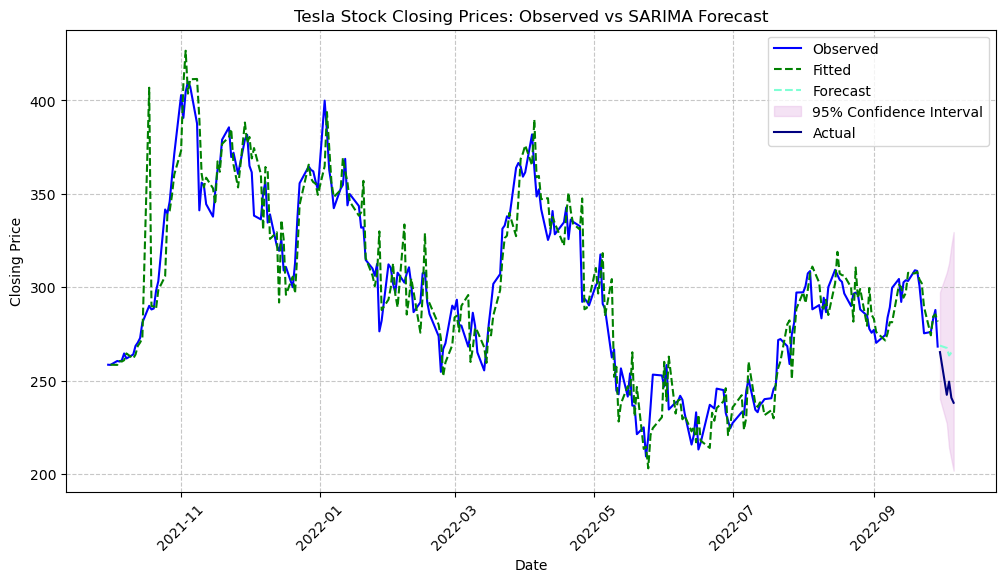

In [304]:
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf

# Get in-sample fitted values
fitted_values = arima_result.predict(typ='levels')  # 'levels' for actual predictions

# Forecast future values
forecast_steps = 5
forecast_result = arima_result.get_forecast(steps=forecast_steps)
forecast_values = forecast_result.predicted_mean
conf_int = forecast_result.conf_int()

# Ensures 'Date' is in datetime format and without timezone
stocks_tesla['Date'] = pd.to_datetime(stocks_tesla['Date']).dt.tz_localize(None)

# Extend the date range for forecasting
last_date = stocks_tesla['Date'].iloc[-1]
forecast_dates = pd.date_range(start=last_date, periods=forecast_steps + 1, freq='B')[1:]

# Prepare forecast DataFrame
forecast_df = pd.DataFrame({
    'Date': forecast_dates,
    'Forecast': forecast_values,
    'Lower CI': conf_int.iloc[:, 0],
    'Upper CI': conf_int.iloc[:, 1]
})

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(stocks_tesla['Date'], stocks_tesla['Close'], label='Observed', color='blue')
plt.plot(stocks_tesla['Date'].iloc[1:], fitted_values.iloc[1:], label='Fitted', color='green', linestyle='--')
plt.plot(forecast_df['Date'], forecast_df['Forecast'], label='Forecast', color='aquamarine', linestyle='--')
plt.fill_between(forecast_df['Date'], forecast_df['Lower CI'], forecast_df['Upper CI'], color='plum', alpha=0.3, label='95% Confidence Interval')

# Fetch and plot actual data
tesla_data = yf.Ticker("TSLA")
actual_data = tesla_data.history(start=forecast_dates[0], end=forecast_dates[-1] + pd.Timedelta(days=1))
actual_data.reset_index(inplace=True)
actual_data['Date'] = actual_data['Date'].dt.tz_localize(None)  # Ensure no timezone

# Merge and plot actual data
forecast_df = pd.merge(forecast_df, actual_data[['Date', 'Close']], on='Date', how='left')
forecast_df.rename(columns={'Close': 'Actual'}, inplace=True)
plt.plot(forecast_df['Date'], forecast_df['Actual'], label='Actual', color='navy')

plt.xticks(rotation=45)
plt.legend()
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Tesla Stock Closing Prices: Observed vs SARIMA Forecast')
plt.grid(visible=True, linestyle='--', alpha=0.7)
plt.show()

In [306]:
#print forecast
forecast_df_base = forecast_df
forecast_df_base

,Date,Forecast,Lower CI,Upper CI,Actual
0,2022-09-30,268.724442,240.148278,297.300606,265.250000
1,2022-10-03,267.483739,227.070940,307.896538,242.399994
2,2022-10-04,263.455987,213.960619,312.951356,249.440002
3,2022-10-05,264.959786,207.807457,322.112114,240.809998
4,2022-10-06,265.640104,201.741858,329.538349,238.130005


In [307]:
from sklearn.metrics import mean_squared_error

# Ensures that forecast and actual data align properly for the RMSE calculation
aligned_data = forecast_df.dropna(subset=['Actual', 'Forecast'])

# Calculate the RMSE of forecast and actual
mse = mean_squared_error(aligned_data['Actual'], aligned_data['Forecast'])
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE) of the Forecast vs Actual: {rmse:.4f}")

Root Mean Squared Error (RMSE) of the Forecast vs Actual: 20.8697


### Using sentiment analysis

In [308]:
import statsmodels.api as sm

# Create SARIMAX model
order = (0, 1, 0)  # ARIMA order (p, d, q)
model = sm.tsa.statespace.SARIMAX(stocks_tesla['Close'], 
                                  exog = stocks_tesla['Average_sentiment'],
                                  order=(0, 1, 0), 
                                  seasonal_order=(1, 1, 0, 12),
                                  enforce_stationarity=False,
                                  enforce_invertibility=False)

# Fit the model
results = model.fit()

# Summary of the model
print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                  252
Model:             SARIMAX(0, 1, 0)x(1, 1, 0, 12)   Log Likelihood                -928.677
Date:                            Wed, 15 May 2024   AIC                           1863.355
Time:                                    05:14:41   BIC                           1873.630
Sample:                                         0   HQIC                          1867.501
                                            - 252                                         
Covariance Type:                              opg                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Average_sentiment    -6.7207      4.072     -1.651      0.099     -14.701       1.259
ar.S.L12      

In [309]:
# Use the last observed sentiment for the next 5 periods forecast
last_sentiment = stocks_tesla['Average_sentiment'].iloc[-1]
forecast_horizon = 5  # Next 5 steps
future_sentiments = np.full(shape=(forecast_horizon,), fill_value=last_sentiment)

# Forecasting
forecast = results.get_forecast(steps=forecast_horizon, exog=future_sentiments)
forecast_df = forecast.summary_frame()

print(forecast_df)

Close        mean    mean_se  mean_ci_lower  mean_ci_upper
252    270.046644  14.470931     241.684141     298.409147
253    266.956743  20.464986     226.846106     307.067379
254    263.516441  25.064387     214.391145     312.641737
255    265.003020  28.941861     208.278014     321.728026
256    265.556669  32.357985     202.136185     328.977154


In [310]:
# Fetch and plot actual data
tesla_data = yf.Ticker("TSLA")
actual_data = tesla_data.history(start=forecast_dates[0], end=forecast_dates[-1] + pd.Timedelta(days=1))
actual_data.reset_index(inplace=True)
actual_data['Date'] = actual_data['Date'].dt.tz_localize(None)  # Ensure no timezone

In [311]:
forecast_values = forecast_df['mean']

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(actual_data['Close'], forecast_values))
print("RMSE:", rmse)

RMSE: 20.792845208503266


In [312]:
# Resetting index 
base = forecast_df_base['Forecast'].reset_index(drop=True)
score_X = forecast_df['mean'].reset_index(drop=True)

# Making sure they have the same length and calcukate similarity between SARIMA and SARIMAX
if len(base) == len(score_X):
    distance = (base - score_X).abs()
else:
    raise ValueError("The series do not have the same length.")

distance

0    1.322202
1    0.526996
2    0.060453
3    0.043234
4    0.083435
dtype: float64

*Rolling Average*

In [313]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Rolling average of 5 previous days
stocks_tesla['SMA_5_sentiment'] = stocks_tesla['Average_sentiment'].rolling(window=5).mean()

# Fill any NaN values that arise due to rolling mean calculation
stocks_tesla['SMA_5_sentiment'].fillna(method='bfill', inplace=True)  # Backfill or another appropriate method

# Model fitting, using the SMA_30_sentiment as the exogenous variable
model = SARIMAX(stocks_tesla['Close'], exog=stocks_tesla['SMA_5_sentiment'], order=(0,1,0), seasonal_order=(1,1,0,12))
results = model.fit()

# Forecasting based 5 recent days
last_30_sentiments = stocks_tesla['SMA_5_sentiment'].iloc[-1]
future_sentiments = np.full(shape=(forecast_horizon,), fill_value=last_30_sentiments)
forecast = results.get_forecast(steps=forecast_horizon, exog=future_sentiments)
forecast_df = forecast.summary_frame()

print(forecast_df)

Close        mean    mean_se  mean_ci_lower  mean_ci_upper
252    270.662518  14.438536     242.363507     298.961529
253    269.877536  20.419174     229.856690     309.898381
254    265.895668  25.008278     216.880343     314.910993
255    266.961484  28.877072     210.363462     323.559506
256    267.626418  32.285549     204.347906     330.904931


In [314]:
forecast_values = forecast_df['mean']

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(actual_data['Close'], forecast_values))
print("RMSE:", rmse)

RMSE: 22.843109394825746


In [315]:
# Resetting index 
base = forecast_df_base['Forecast'].reset_index(drop=True)
score_X = forecast_df['mean'].reset_index(drop=True)

# Making sure they have the same length and calcukate similarity between SARIMA and SARIMAX
if len(base) == len(score_X):
    distance = (base - score_X).abs()
else:
    raise ValueError("The series do not have the same length.")

distance

0    1.938077
1    2.393797
2    2.439681
3    2.001698
4    1.986315
dtype: float64